# **Stock Price Prediction**



This python program will be used to predict stock price. Time series analysis will be used in order to make the prediction. Time series analysis can be useful to see how stock price changes over time. A time series can be taken on any variable that changes over time.

## Tools that will be used in this project
  

Importing the required libraries

  1. Python
  2. Jupyter Notebooks
  3. Markdown (still need to learn)
  4. Pandas
  5. Matplotlib
  6. Numpy
  7. Scikit Learn
  8. Time Series Analysis
  9. Web Scrapping (Still need to learn Beautiful Soup)

In [6]:
# import the required python libraries to use.
import numpy as np # Python is used for working with arrays.
import pandas as pd # Pandas is used to analyze data.
from dateutil.parser import parse
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt #for plotting the data 
# Diplay the plots in the jupyter notebooks
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# Specify the style sheet to use
plt.style.use('seaborn')
# Module supplies classes for manipulating dates and times.
from datetime import datetime, timedelta
# Matplotlib.dates provides sophisticated date plotting capabilities
import matplotlib.dates as mpl_dates 
# Transform features by scaling each feature to a given range
from sklearn.preprocessing import MinMaxScaler


## Data to be used.
We will use <BeautifulSoup> to obtain the JSE data to use for this project. Currently the Data is not avaible and we will use Yahoo Finance Data to train the model. The stock that we will experiment with is the google stock.


In [7]:
# Stock data from Yahoo Finance
link = "https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1603054888&period2=1634590888&interval=1d&events=history&includeAdjustedClose=true"


## Data Analysis

In [41]:
#Reading the CSV data into a pandas data dataframe
goog = pd.read_csv(link, parse_dates=['Date'], index_col='Date')
# Reading the firt few lines of the data
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,1580.459961,1588.150024,1528.000000,1534.609985,1534.609985,1607100
2020-10-20,1527.050049,1577.500000,1525.670044,1555.930054,1555.930054,2241700
2020-10-21,1573.329956,1618.729980,1571.630005,1593.310059,1593.310059,2568300
2020-10-22,1593.050049,1621.989990,1585.000000,1615.329956,1615.329956,1433600
2020-10-23,1626.069946,1642.359985,1620.510010,1641.000000,1641.000000,1375800


In [23]:
#Check the shape of the data
rows = goog.shape[0]
columns = goog.shape[1]
print(f'The data contains {rows} rows and {columns} columns.')

The data contains 252 rows and 7 columns.


The data has 252 rows and 7 columns.

For the sake of our analysis we will use the Date and Close columns. 

In [24]:
# Drop unnecessary columns

# We will currently use the date and the CLose price to build our initial programe.
google = goog[['Date', 'Close']]
#Drop Date column
#google_close = google.drop('Date', axis = 1)
#google_close = google_close.reset_index(drop = True)
google.head()

,Date,Close
0,2020-10-19,1534.609985
1,2020-10-20,1555.930054
2,2020-10-21,1593.310059
3,2020-10-22,1615.329956
4,2020-10-23,1641.000000


In [38]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   252 non-null    float64       
 1   Date    252 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


Set set the data column as an index.

## Visualising the data 
We will use a time series plot to visualize the data.

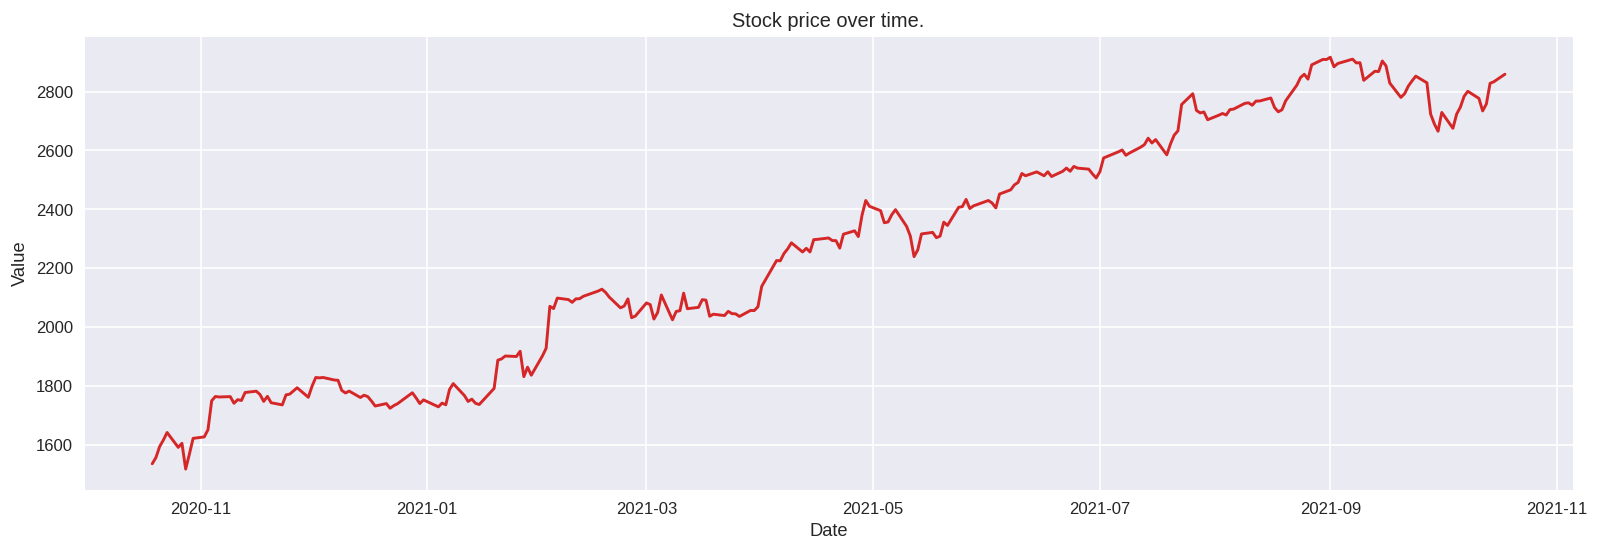

In [42]:
# Time series data source

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=120):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(google, x=google.index, y=google.Close, title='Google: Stock price over a year.')    

 Plot this on both sides of the Y axis to emphasize the growth.

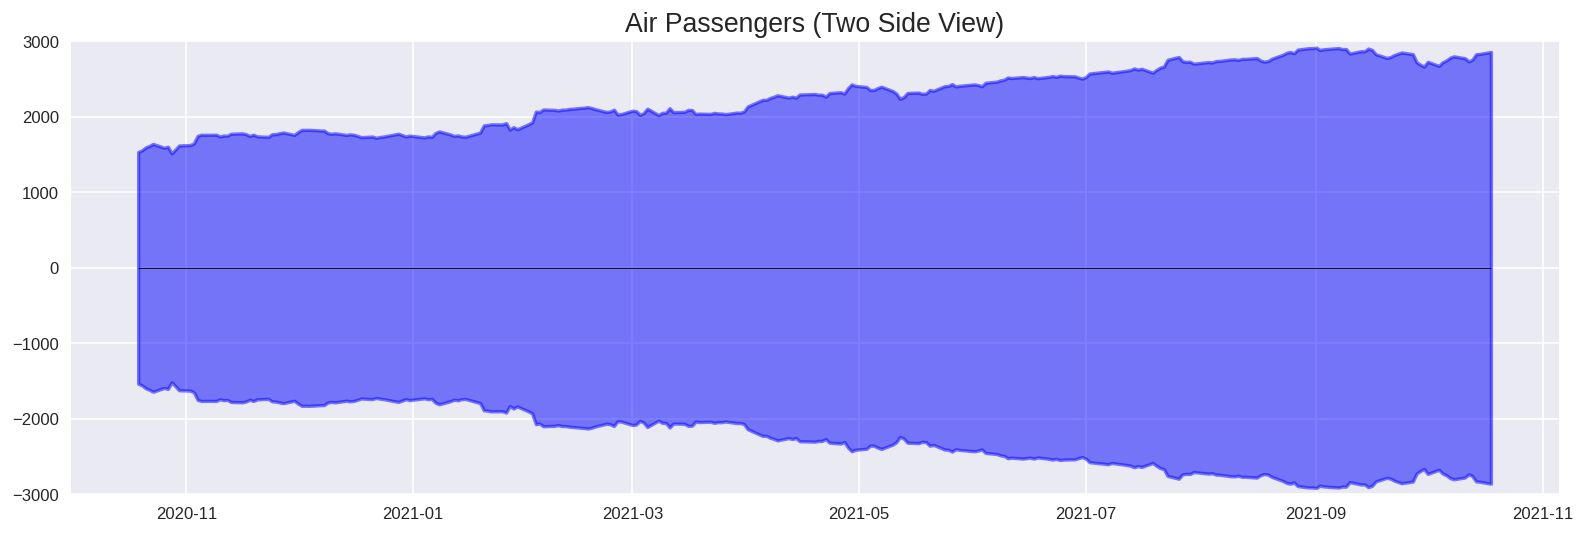

In [54]:
# Import data
df = google
x = df.index.values
y1 = df['Close'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='blue')
plt.ylim(-3000, 3000)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

In [ ]:
# A way to normalize the input features/variables is the Min-Max scaler. 
# By doing so, all features will be transformed into the range [0,1] meaning 
# that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.
# module has been imported above
# from sklearn.preprocessing import MinMaxScaler

# Create the instance of the class
scaler = MinMaxScaler(feature_range=(0, 1))
# create a copy of the data to perform scaling on
google_N = google.copy()

# Generally, scikit-learn works on any numeric data stored as numpy arrays or scipy sparse matrices. 
# Other types that are convertible to numeric arrays such as pandas DataFrame are also acceptable.

# Create a variable with the values in the Close Column converted to a numpy array
# This will return a numpy arrany with 1 dimension (checked using Close_N.ndim)
Close_N = google_N.Close.to_numpy()
# Reshape is used to give a new shape to an array without changing its data.
# Scikit-learn has been built to expect array shapes that both represent 
  # (1) the number of samples and 
  # (2) the dimensionality and hence number of features in each sample.
# We have 1 feature in this case and multiple samples (-1)
Close_N = Close_N.reshape(-1, 1)
# Fit to data, then transform it.
Close_N = scaler.fit_transform(X)
# Add the normalized close column to the dataset
google_N["Close_N"] = Close_N
google_N.head()


,Date,Close,Close_N
0,2020-10-19,1534.609985,0.012848
1,2020-10-20,1555.930054,0.028074
2,2020-10-21,1593.310059,0.054770
3,2020-10-22,1615.329956,0.070496
4,2020-10-23,1641.000000,0.088829


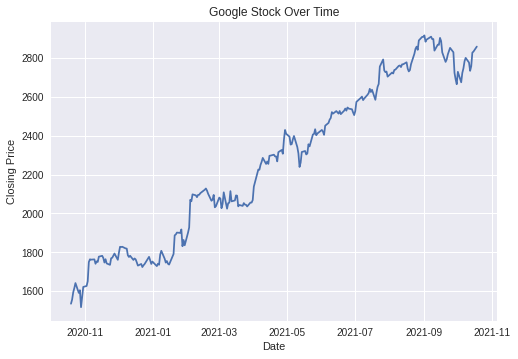

In [ ]:
#fixing the dates for plotting
googleN['Date'] = pd.to_datetime(google['Date'])
googleN = googleN.sort_values('Date')

#Assign values for plotting
price_close = googleN['Close']
price_date = googleN['Date']

# Plotting the data
plt.plot(price_date, price_close)
plt.title('Google Stock Over Time') # Set the title
plt.xlabel('Date') # Set the X-axis label
plt.ylabel('Closing Price') # Set the y - axis label
plt.show() # show the plot

In [ ]:
googleN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     252 non-null    datetime64[ns]
 1   Close    252 non-null    float64       
 2   Close_N  252 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.9 KB
